In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Fix path to have the root of the 'reluctant_walks' package
import sys
sys.path.append("..")

In [4]:
import reluctant_walks

In [5]:
from reluctant_walks import Step, StepSet
from reluctant_walks.compilers.genrgens import GenRGenSWalkCompiler
from reluctant_walks.compilers.combstruct import CombstructWalkCompiler
from reluctant_walks.reference import is_quarter_plane, get_nontrivial_qw_model, POSSIBLE_NT_SLOPES

In [6]:
by_best_slope = list(POSSIBLE_NT_SLOPES)
if 0 in by_best_slope:
    del by_best_slope[by_best_slope.index(0)]
models = get_nontrivial_qw_model(by_drift=[-1], by_best_slope=by_best_slope)
model = models[1]
model

{'best_slope': (1, 2),
 'coord': (4, 7),
 'drift': -1,
 'id': 14,
 'size': 4,
 'steps': [(0, 1), (1, -1), (0, -1), (-1, 0)],
 'stepset': StepSet
     Z49: ( 0, +1) weight: 1
     Z50: (+1, -1) weight: -1
     Z51: ( 0, -1) weight: -1
     Z52: (-1,  0) weight: 0
 }

In [7]:
model['stepset'].slope = model['best_slope']

In [8]:
genrgens = GenRGenSWalkCompiler(model['stepset'])

In [84]:
unrestricted_walks = genrgens.generate(100, 100)
restricted_walks = filter(is_quarter_plane, unrestricted_walks)
print("{} out of {} generated walks were in quarterplane".format(
    len(restricted_walks), len(unrestricted_walks)))

3 out of 100 generated walks were in quarterplane


In [90]:
from matplotlib.lines import Line2D

def plot_walk(walk, color='red', alpha=0.04):
    Xcur = 0
    Ycur = 0
    Xvec = []
    Yvec = []
    for i in range(len(walk)):
        step = walk[i]
        Xnex = Xcur + step.x
        Ynex = Ycur + step.y
        Xvec.append(Xcur)
        Yvec.append(Ycur)
        Xcur = Xnex
        Ycur = Ynex
    Xvec.reverse()
    Yvec.reverse()
    #line = Line2D(Xvec,Yvec)
    return plt.plot(Xvec, Yvec, color=color, alpha=alpha)

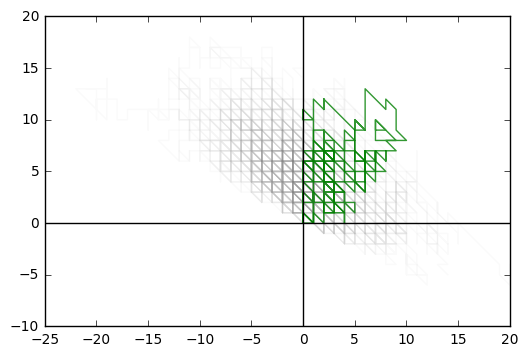

In [97]:
for walk in unrestricted_walks:
    plot_walk(walk, color='grey', alpha=0.04)
for walk in restricted_walks:
    plot_walk(walk, color='green', alpha=0.8)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()